# **Predicting Credit card approval of an individual**

 **Introduction**:

We are working on a credit card dataset, in which we have information on the individuals such as gender, car owner, property owner, children, etc. This dataset contains 19 columns and 1548 rows. There are 9 numerical variables,2 continuous variables and 8 categorical variables. Based on these factors we need to predict each individual's credit card approvals and check missing values, outliers present or not. We have to deal with this messy data to predict the outcome.

1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

A.This proposal is very important because approving credit to the right people who have good creditworthiness is very important. Before approving the loans, banks need to know whether they are capable of repaying the loan amount or not. Predicting a good client is essential then they would be able to get back their credit in a specified time along with good interests. So, banks are getting profits through the rotation of money with less risk.

2.How is it going to impact the banking sector?

A.This proposal impacts the banking sector so they would be able to choose the right people who can repay the loan sincerely. Banks can easily give credit cards to those with good creditworthiness which leads to better risk management.

**3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

A.The gap in the knowledge is that we need to add one more feature: the CIBIL score which is very important for predicting the approvals. Bankers check the CIBIL score to approve the loans. Most of the applications get rejected due to fewer CIBIL scores. However, the proposed method can be adapted and applied to banks to evaluate good creditworthiness based on some individual factors leading to better risk management and profitability.

In [37]:
import numpy as np
import pandas as  pd
import missingno as msno
import seaborn as sns
import matplotlib. pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
!pip install fancyimpute
from matplotlib.pyplot import figure
import plotly.express as px

In [38]:
data1=pd.read_csv('/content/Credit_card.csv')
data2=pd.read_csv("/content/Credit_card_label.csv")

In [39]:
df1=data1.copy()
df1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


(20.951999999999998, 25.7]    0.031654
(25.7, 30.4]                  0.124031
(30.4, 35.1]                  0.141473
(35.1, 39.8]                  0.114341
(39.8, 44.5]                  0.134367
(44.5, 49.2]                  0.117571
(49.2, 53.9]                  0.083979
(53.9, 58.6]                  0.114987
(58.6, 63.3]                  0.083979
(63.3, 68.0]                  0.039406
Name: Age, dtype: float64


<Axes: ylabel='Frequency'>

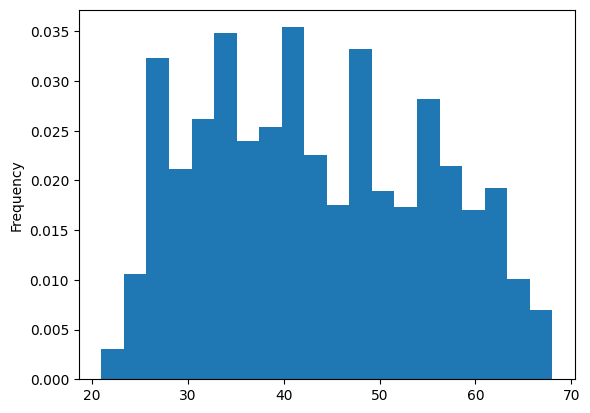

In [40]:
df1['Age']=-(df1['Birthday_count'])//365
print(df1['Age'].value_counts(bins=10,normalize=True,sort=False))
df1['Age'].plot(kind='hist',bins=20,density=True)

In [41]:
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,NaN
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0


In [42]:
df2=data2.copy()
df2

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [43]:
df2.index.name='Index'
df2

,Ind_ID,label
Index,,
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0


In [44]:
df1.index.name='Index'
df1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age
Index,,,,,,,,,,,,,,,,,,,
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,NaN
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,32.0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,28.0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,36.0


ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.


In [45]:
#mergeing two datasets
df=df1.merge(df2,how='outer')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,51.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,NaN,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1


In [46]:
#df=pd.merge(df1,df2,on="Ind_ID")
#df.head()

In [47]:
ndf=df.copy()
ndf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,51.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,NaN,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1


In [48]:
ndf.shape

(1548, 20)

In [49]:
ndf.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Age', 'label'],
      dtype='object')

In [50]:
ndf.GENDER.unique()

array(['M', 'F', nan], dtype=object)

In [51]:
ndf.GENDER.value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [52]:
ndf.label.value_counts()#Label: 0 is application approved and 1 is application rejected.

0    1373
1     175
Name: label, dtype: int64

In [53]:
ndf.Housing_type.value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [54]:
ndf.Family_Members.value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

In [55]:
ndf.Employed_days.value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: Employed_days, Length: 956, dtype: int64

In [56]:
ndf.EMAIL_ID.value_counts()

0    1405
1     143
Name: EMAIL_ID, dtype: int64

In [57]:
ndf.EDUCATION.value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [58]:
ndf.Car_Owner.value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [59]:
ndf.Car_Owner.unique()

array(['Y', 'N'], dtype=object)

In [60]:
ndf.Type_Occupation.value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [61]:
ndf['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [62]:
ndf.Marital_status.value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [63]:
ndf.CHILDREN.value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

In [64]:
ndf.Annual_income.value_counts()

135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 115, dtype: int64

In [65]:
ndf.Type_Income.value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [66]:
#checking for  duplicate data
dups = ndf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

ndf[dups]

Number of duplicate rows = 0


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,label


In [67]:
# for dropping duplicates we use this formula:
#ndf.drop_duplicates(inplace=True)

Here we don't have to deal with duplicates as there are no duplicates in dataset.

In [68]:
ndf.shape

(1548, 20)

#Now Lets deal with the Outliers in dataset:

To check for outliers ,we will be plotting the box plots.

<Axes: >

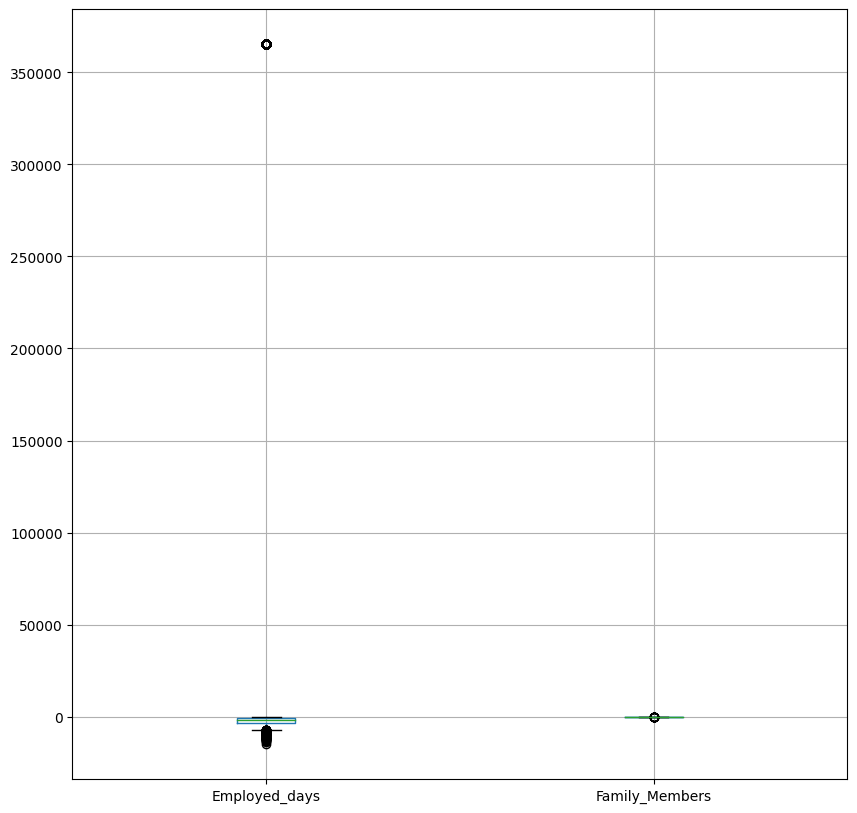

In [69]:
ndf.boxplot(column = ['Employed_days','Family_Members'], figsize = (10,10))

*Looking at the box plot, it seems that the variable ANNUAL INCOME have outliers.**

**These outliers value needs to be treated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**

**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [70]:
"""def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range"""

'def remove_outlier(col):\n    sorted(col)\n    Q1,Q3=col.quantile([0.25,0.75])\n    IQR=Q3-Q1\n    lower_range= Q1-(1.5 * IQR)\n    upper_range= Q3+(1.5 * IQR)\n    return lower_range, upper_range'

In [71]:
"""lrincome,urincome=remove_outlier(ndf['Annual_income'])
ndf['Annual_income']=np.where(ndf['Annual_income']>urincome,urincome,ndf['Annual_income'])
ndf['Annual_income']=np.where(ndf['Annual_income']<lrincome,lrincome,ndf['Annual_income'])
ndf.shape"""

"lrincome,urincome=remove_outlier(ndf['Annual_income'])\nndf['Annual_income']=np.where(ndf['Annual_income']>urincome,urincome,ndf['Annual_income'])\nndf['Annual_income']=np.where(ndf['Annual_income']<lrincome,lrincome,ndf['Annual_income'])\nndf.shape"

In [72]:
"""ndf.boxplot(column=['Annual_income'])
plt.show()"""

"ndf.boxplot(column=['Annual_income'])\nplt.show()"

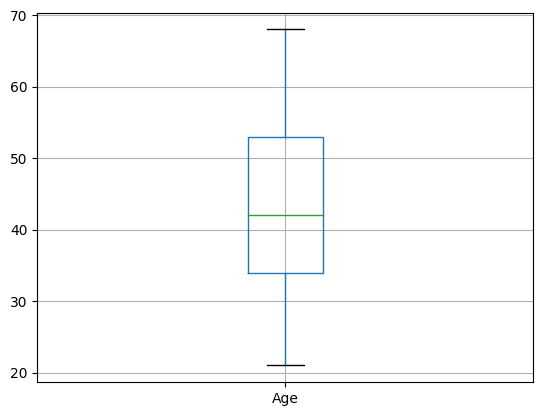

In [73]:
ndf.boxplot(column=['Age'])
plt.show()

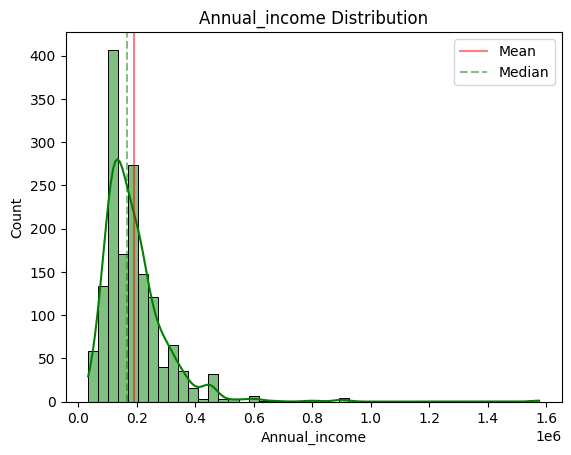

In [74]:
Annualincome=ndf['Annual_income']# Bmi distribution
sns.histplot(data =ndf['Annual_income'],bins=45, kde = True,color='green') # creating histogram with density plot
plt.axvline(x=Annualincome.mean(),color='red',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=Annualincome.median(),c='green',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.title("Annual_income Distribution")
plt.legend() # adding legend

In [75]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [76]:
ndf.skew()

<ipython-input-76-3f3789bc5298>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ndf.skew()


Ind_ID            0.072346
CHILDREN          4.631122
Annual_income     3.924564
Birthday_count   -0.171087
Employed_days     1.770964
Mobile_phone      0.000000
Work_Phone        1.440179
Phone             0.825309
EMAIL_ID          2.818216
Family_Members    2.232273
Age               0.172328
label             2.446379
dtype: float64

In [77]:
ndf.index.name="S.NO"
ndf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,label
S.NO,,,,,,,,,,,,,,,,,,,,
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,51.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,NaN,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,37.0,1


In [78]:
ndf.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Age,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1526.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,43.439712,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,11.587725,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,42.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,68.000000,1.000000


In [79]:
ndf.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Age                 22
label                0
dtype: int64

**We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.**

In this case:
1.I will remove the missing values from the columns which dont have extreme missing values.

2.I will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.

In [80]:
ndf[ndf.isnull().sum()[ndf.isnull().sum()>0].index].dtypes

GENDER              object
Annual_income      float64
Birthday_count     float64
Type_Occupation     object
Age                float64
dtype: object

In [81]:
ndf.shape

(1548, 20)

In [82]:
ndf.dropna(subset='GENDER',axis=0,inplace=True)

In [83]:
ndf.dropna(subset='Annual_income',axis=0,inplace=True)

In [84]:
ndf.dropna(subset='Age',axis=0,inplace=True)

In [85]:
ndf["Type_Occupation"].fillna(ndf["Type_Occupation"].mode()[0],inplace=True)


or

In [86]:
"""mode1=ndf["Type_Occupation"].mode().values[0]
ndf["Type_Occupation"]=ndf["Type_Occupation"].replace(np.nan,mode1)"""

'mode1=ndf["Type_Occupation"].mode().values[0]\nndf["Type_Occupation"]=ndf["Type_Occupation"].replace(np.nan,mode1)'

or

In [87]:
#ndf.Type_Occupation=ndf['Type_Occupation'].fillna(ndf["Type_Occupation"].mode()[0])

In [88]:
ndf.shape


(1496, 20)

In [89]:
# Again Check for missing value in any column
ndf.isnull().sum()[df.isnull().sum()>0]

GENDER             0
Annual_income      0
Birthday_count     0
Type_Occupation    0
Age                0
dtype: int64

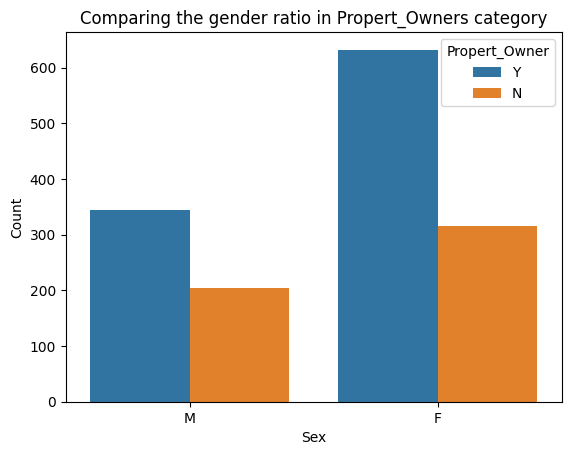

In [90]:
sns.countplot(data=ndf, x="GENDER", hue="Propert_Owner")
plt.title("Comparing the gender ratio in Propert_Owners category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

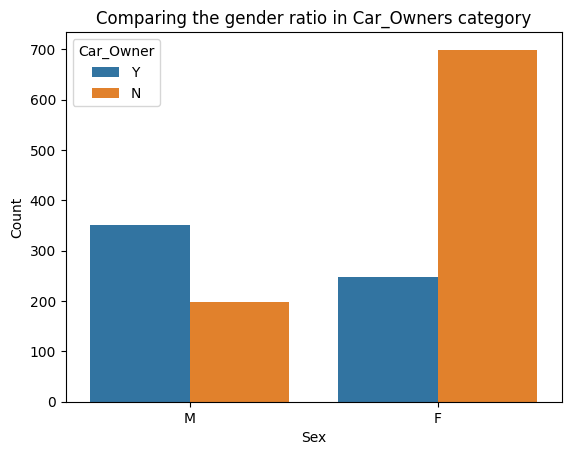

In [91]:
sns.countplot(data=ndf, x="GENDER",hue="Car_Owner")
plt.title("Comparing the gender ratio in Car_Owners category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

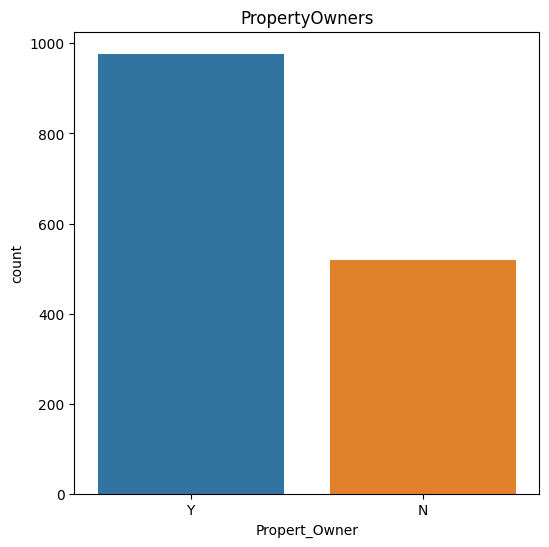

In [92]:
plt.figure(figsize=(6,6))
sns.countplot(x='Propert_Owner',data=ndf)
plt.title("PropertyOwners")
plt.show()

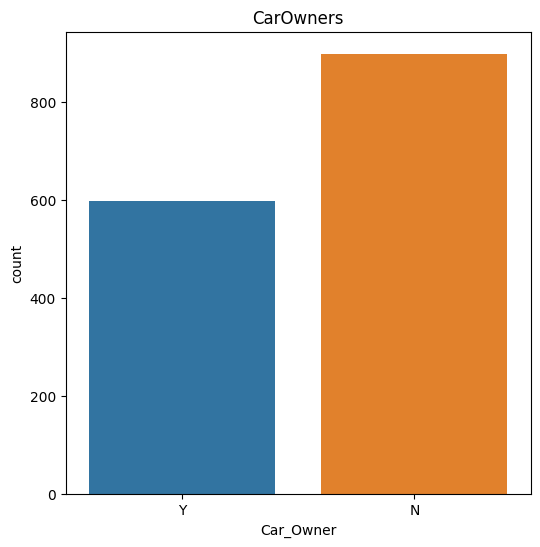

In [93]:
plt.figure(figsize=(6,6))
sns.countplot(x='Car_Owner',data=ndf)
plt.title("CarOwners")
plt.show()

<Axes: >

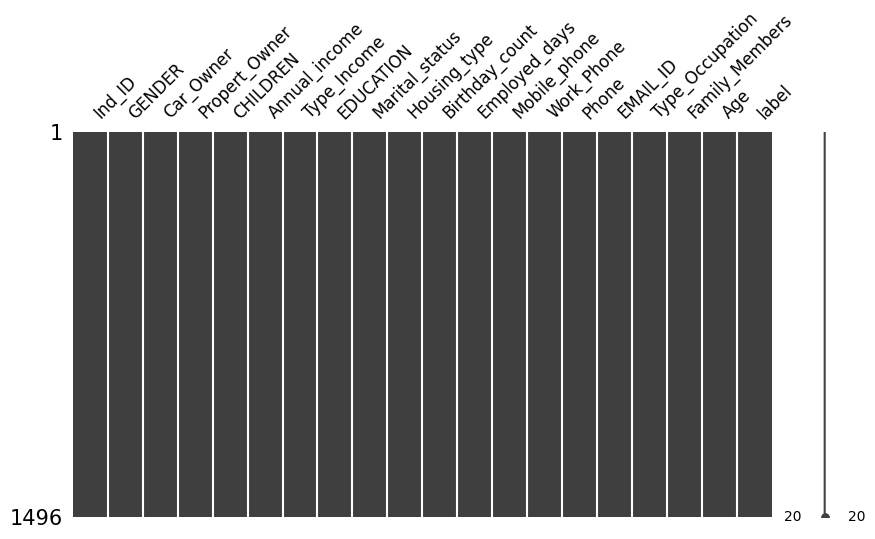

In [94]:
#Checking relation between missingness
import missingno as msno
msno.matrix(ndf, figsize=(10,5), fontsize=12)

<Axes: >

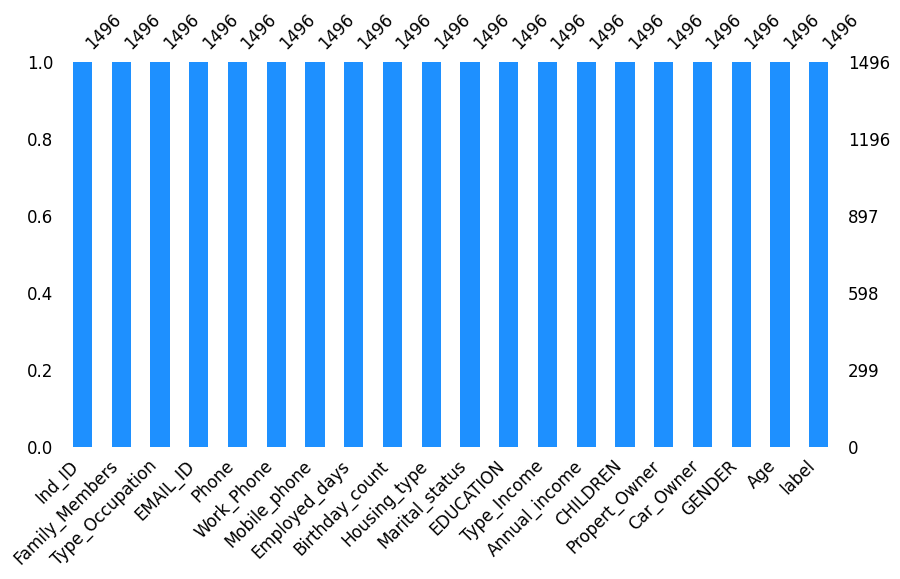

In [95]:
#Checking relation between missingness
'''import missingno as msno
msno.matrix(ndf, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))
#create bar graph for missing values'''
msno.bar(ndf.sample(1496),color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

**OBSERVATION:**
There is relation between missingness in the variables.Hence,It is MCAR.

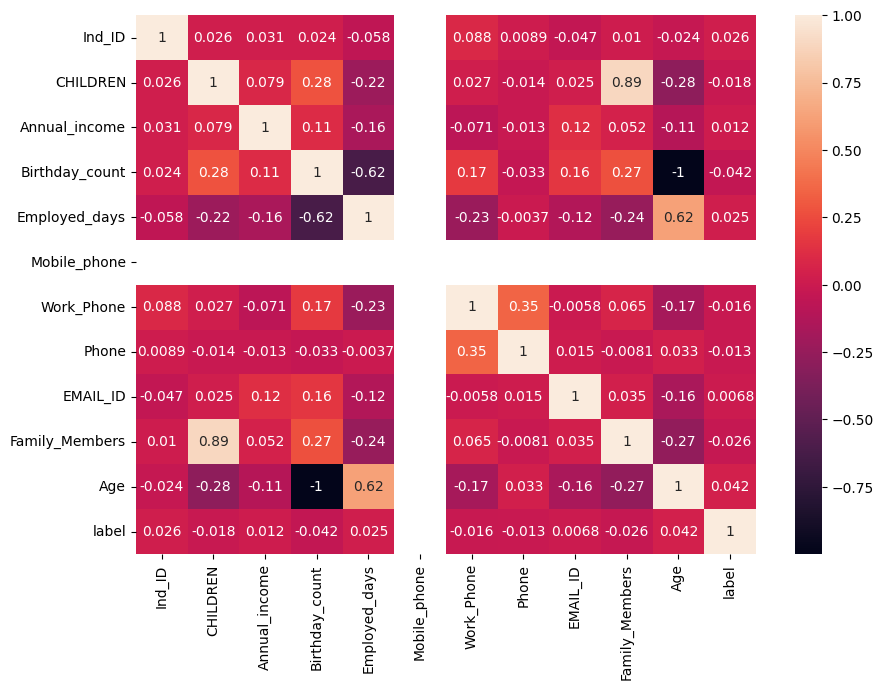

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(data=ndf.corr(numeric_only=True),annot=True)
plt.show()

In [97]:
import missingno as msno

In [98]:
"""sns.pairplot(ndf,diag_kws={'bins':15,'kde':True,'color':'olive'})
plt.show()"""

"sns.pairplot(ndf,diag_kws={'bins':15,'kde':True,'color':'olive'})\nplt.show()"

In [99]:
#sns.displot(ndf["Birthday_count"], kind="kde")

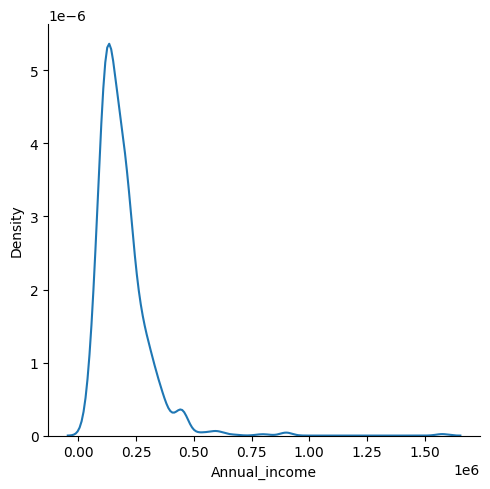

In [100]:
sns.displot(ndf["Annual_income"], kind="kde")

<Axes: xlabel='Type_Income', ylabel='count'>

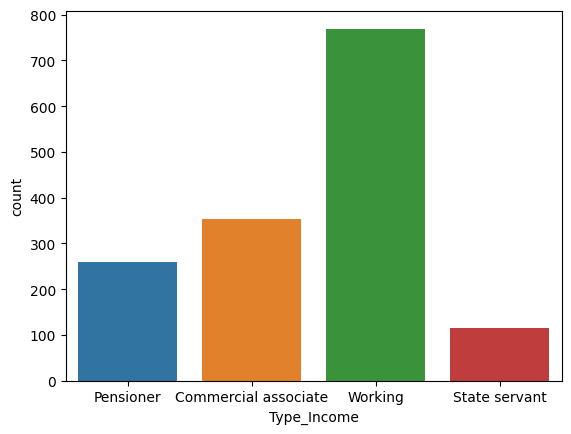

In [101]:
sns.countplot(x=ndf["Type_Income"])

<Axes: xlabel='Type_Income', ylabel='count'>

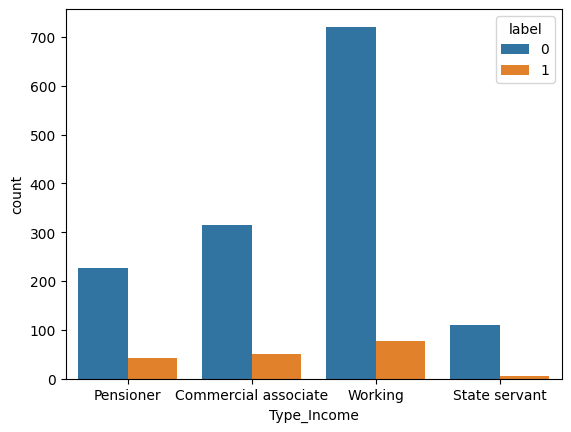

In [102]:
sns.countplot(data=df, x="Type_Income", hue="label")

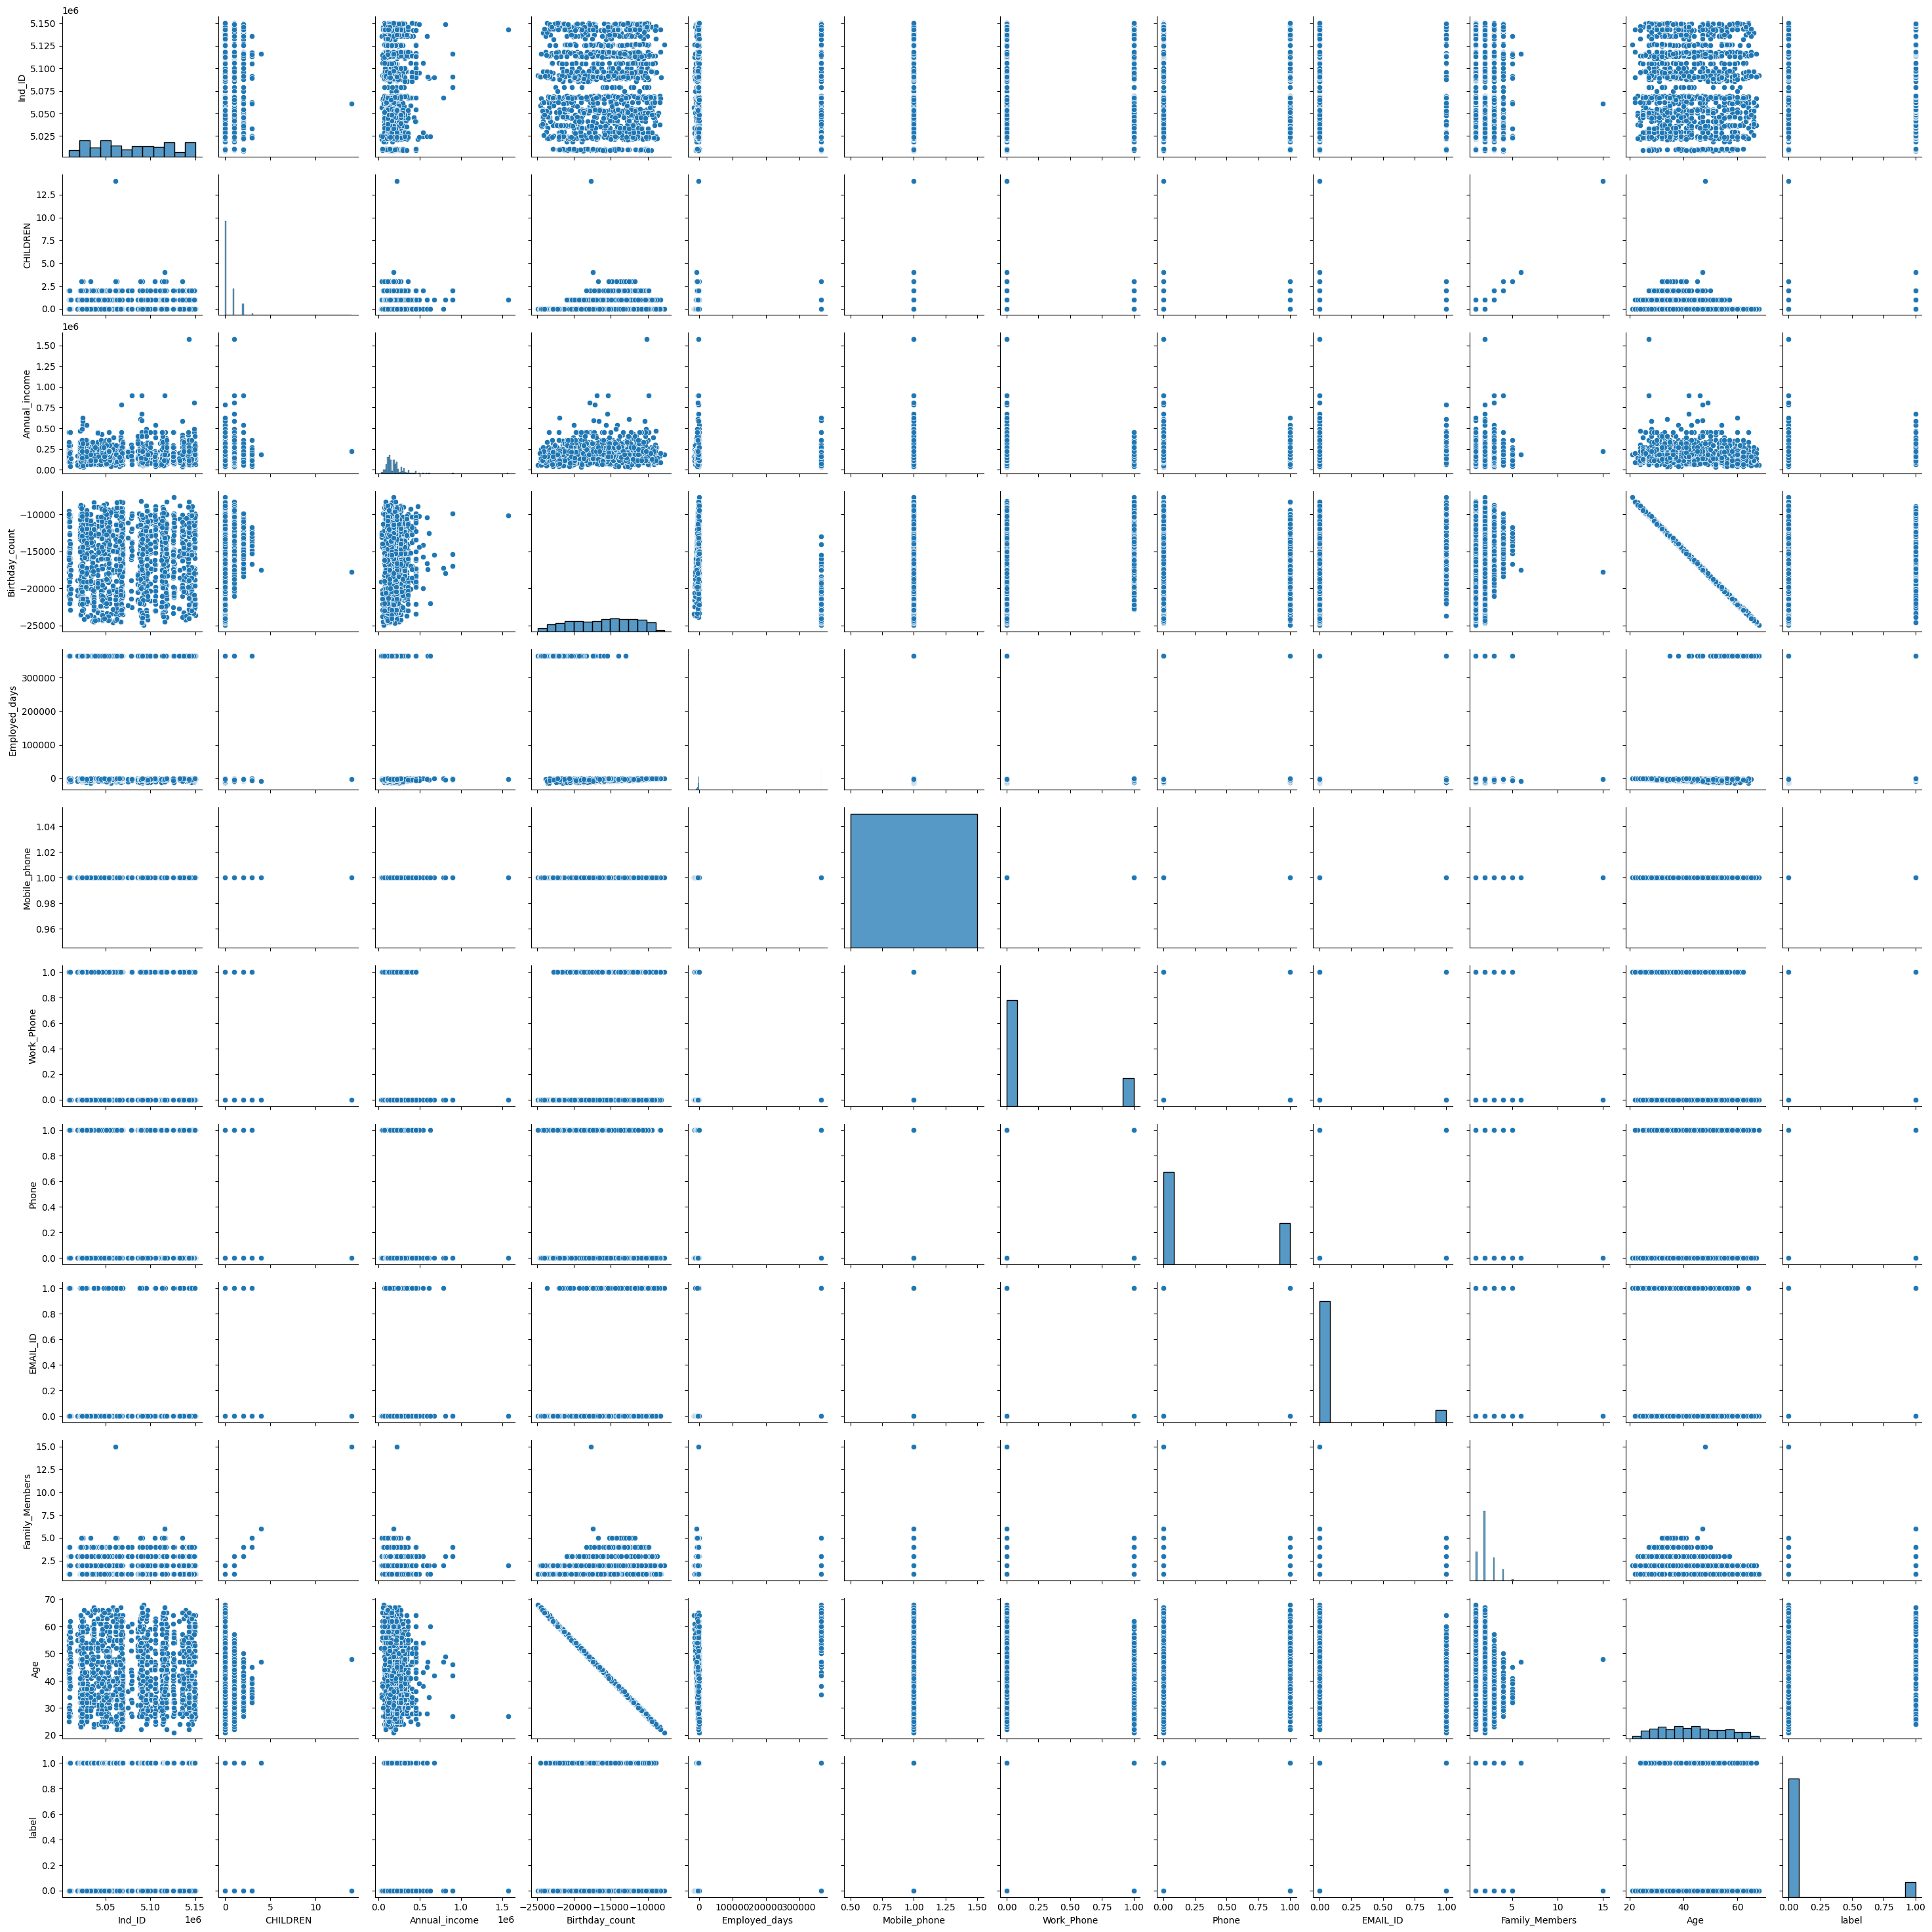

In [103]:
sns.pairplot(df)
plt.show()

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

<Axes: xlabel='Annual_income'>

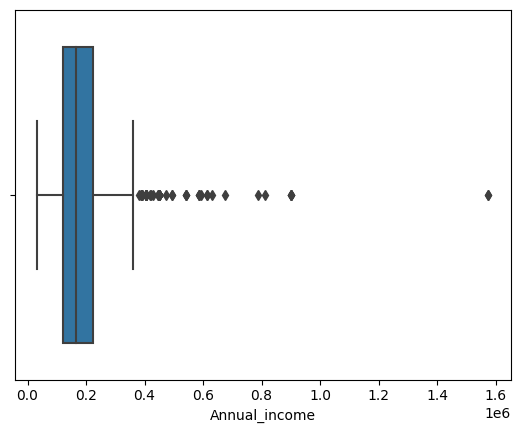

In [104]:
sns.boxplot(data=ndf,x="Annual_income")

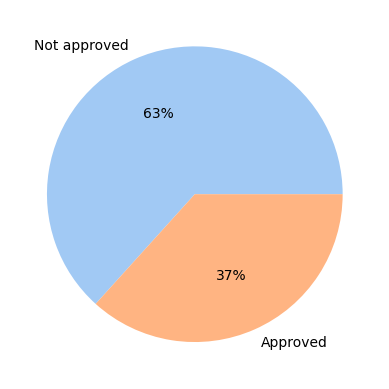

In [105]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(ndf["GENDER"].value_counts(), labels = ["Not approved","Approved"],
                                        colors = colors, autopct='%.0f%%')
plt.show()

In [106]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1496 non-null   int64  
 1   GENDER           1496 non-null   object 
 2   Car_Owner        1496 non-null   object 
 3   Propert_Owner    1496 non-null   object 
 4   CHILDREN         1496 non-null   int64  
 5   Annual_income    1496 non-null   float64
 6   Type_Income      1496 non-null   object 
 7   EDUCATION        1496 non-null   object 
 8   Marital_status   1496 non-null   object 
 9   Housing_type     1496 non-null   object 
 10  Birthday_count   1496 non-null   float64
 11  Employed_days    1496 non-null   int64  
 12  Mobile_phone     1496 non-null   int64  
 13  Work_Phone       1496 non-null   int64  
 14  Phone            1496 non-null   int64  
 15  EMAIL_ID         1496 non-null   int64  
 16  Type_Occupation  1496 non-null   object 
 17  Family_Members

In [107]:
fig = px.histogram(ndf,
                  x = "label",
                  marginal = 'box',
                   color="Type_Income",
                  title = "Creditcard approved over type Income ")
fig.update_layout(bargap=0.2)
fig.show()

In [108]:
fig = px.histogram(ndf,
                  x = "label",
                  marginal = 'box',
                   color="GENDER",
                  title = "Creditcard approved OVER Gender ")
fig.update_layout(bargap=0.2)
fig.show()

In [109]:
ndf.skew()

<ipython-input-109-3f3789bc5298>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Ind_ID            0.060363
CHILDREN          4.679797
Annual_income     3.993676
Birthday_count   -0.169293
Employed_days     1.772492
Mobile_phone      0.000000
Work_Phone        1.456246
Phone             0.848886
EMAIL_ID          2.780195
Family_Members    2.261957
Age               0.170465
label             2.546126
dtype: float64

#Correlation HeatMap

<ipython-input-110-88a179c09cd1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



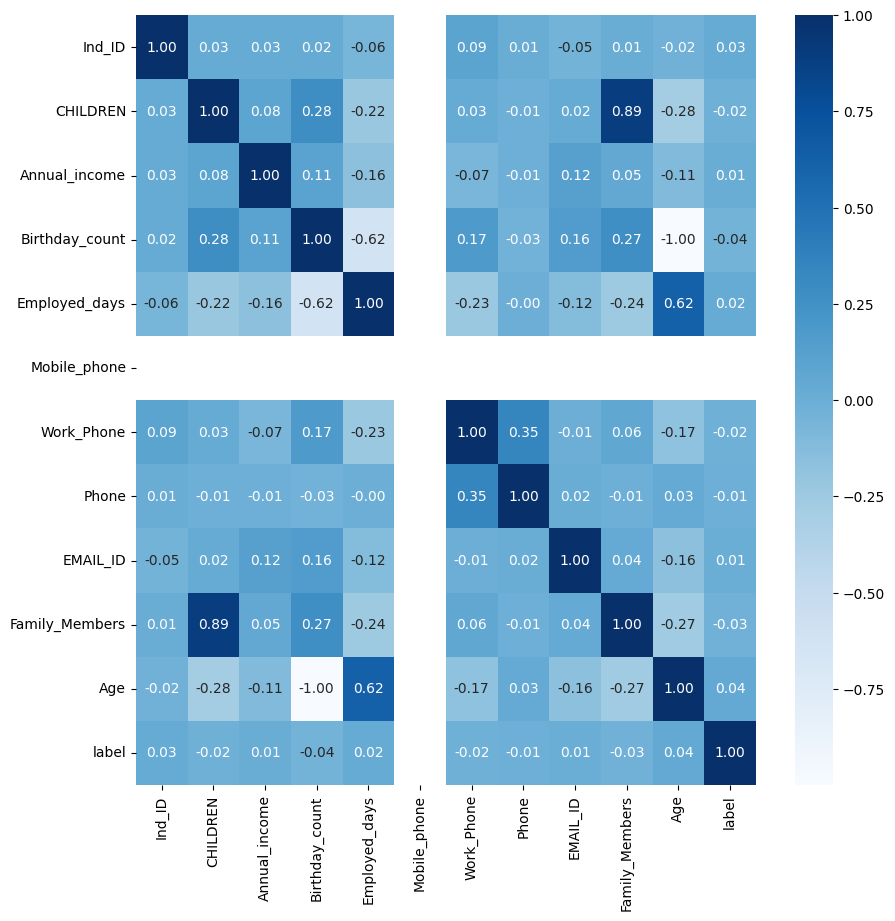

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(ndf.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [111]:
#importing plotly express sub module
import plotly.express as px
print(ndf["GENDER"].value_counts())
#plotting histogram for annual_income of genders
fig = px.histogram(ndf,x = 'Annual_income',
                   color = 'GENDER',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Annual_income  over genders')
fig.update_layout(bargap=0.1)
fig.show()

F    947
M    549
Name: GENDER, dtype: int64


0    1336
1     160
Name: label, dtype: int64


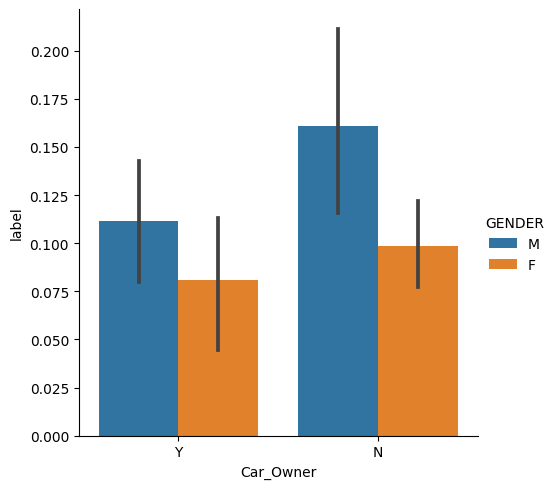

In [112]:
print(ndf["label"].value_counts())
sns.catplot(data=ndf, x="Car_Owner",y="label",hue="GENDER", kind="bar")

In [113]:
ndf.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Age', 'label'],
      dtype='object')

In [114]:
ndf

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,label
S.NO,,,,,,,,,,,,,,,,,,,,
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Laborers,2,51.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,37.0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,37.0,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,37.0,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,Laborers,2,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,30.0,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,28.0,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,36.0,0


In [115]:
ndf.drop(["CHILDREN","EDUCATION","Marital_status","Birthday_count",
            'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members'
       ], axis = 1,inplace=True)

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

In [116]:
from sklearn.preprocessing import LabelEncoder


In [117]:
cols = ['GENDER', 'Car_Owner','Propert_Owner', 'Type_Income', 'Type_Occupation','Housing_type']
#
# Encode labels of multiple columns at once
#
ndf[cols] = ndf[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
ndf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,Housing_type,Employed_days,Mobile_phone,Type_Occupation,Age,label
S.NO,,,,,,,,,,,,
0,5008827,1,1,1,180000.0,1,1,365243,1,8,51.0,1
1,5009744,0,1,0,315000.0,0,1,-586,1,8,37.0,1
4,5009752,0,1,0,315000.0,0,1,-586,1,8,37.0,1
6,5009754,0,1,0,315000.0,0,1,-586,1,8,37.0,1
7,5009894,0,0,0,180000.0,1,1,365243,1,8,60.0,1


In [118]:
'''x=ndf.drop(["label"],axis=1)
print(x.head())
y=ndf["label"]
y.head()'''

'x=ndf.drop(["label"],axis=1)\nprint(x.head())\ny=ndf["label"]\ny.head()'

or

**Getting independent features in dataset(X) and dependent feature in series(y)**

In [119]:
X=ndf.iloc[:,:-1]

In [120]:
X.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,Housing_type,Employed_days,Mobile_phone,Type_Occupation,Age
S.NO,,,,,,,,,,,
0,5008827,1,1,1,180000.0,1,1,365243,1,8,51.0
1,5009744,0,1,0,315000.0,0,1,-586,1,8,37.0
4,5009752,0,1,0,315000.0,0,1,-586,1,8,37.0
6,5009754,0,1,0,315000.0,0,1,-586,1,8,37.0
7,5009894,0,0,0,180000.0,1,1,365243,1,8,60.0


In [121]:
y=ndf.iloc[:,-1]

In [122]:
y.head()

S.NO
0    1
1    1
4    1
6    1
7    1
Name: label, dtype: int64

**Feature selection and model bulding**

In [124]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.334060
         Iterations 7
                         Results: Logit
Model:               Logit            Method:           MLE      
Dependent Variable:  label            Pseudo R-squared: 0.018    
Date:                2023-09-22 13:04 AIC:              1021.5087
No. Observations:    1496             BIC:              1079.9248
Df Model:            10               Log-Likelihood:   -499.75  
Df Residuals:        1485             LL-Null:          -508.78  
Converged:           1.0000           LLR p-value:      0.054052 
No. Iterations:      7.0000           Scale:            1.0000   
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Ind_ID            0.0000   0.0000  0.9578 0.3382  -0.0000  0.0000
GENDER            0.5375   0.1899  2.8312 0.0046   0.1654  0.9097


In [125]:
significance_level = 0.05

# Get the p-values from the OLS model
p_values = result.pvalues

# Select the features with p-values below the significance level
selected_features = p_values[p_values < significance_level].index

# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['GENDER', 'Type_Income'], dtype='object')


**** Based on the P-value "Ind_ID", "Car_Owner", "Propert_Owner", "Annual_income", "EDUCATION", "Mobile_phone", "Annual_income" are not necessary. we can remove the variables whose p-value is less than 0.05.

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [128]:
ndf.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income',
       'Type_Income', 'Housing_type', 'Employed_days', 'Mobile_phone',
       'Type_Occupation', 'Age', 'label'],
      dtype='object')

In [129]:
X = ndf[[ 'Ind_ID' ,'Car_Owner', 'Propert_Owner', 'Annual_income','Housing_type',
       'Employed_days','Mobile_phone','Type_Occupation','Age']]
y = ndf.label

In [130]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [131]:
X_train.shape, y_train.shape

((1271, 9), (1271,))

In [132]:
## both will have same shape
X_test.shape, y_test.shape

((225, 9), (225,))

In [133]:
X_train.head()

,Ind_ID,Car_Owner,Propert_Owner,Annual_income,Housing_type,Employed_days,Mobile_phone,Type_Occupation,Age
S.NO,,,,,,,,,
1051,5150221,1,1,116100.0,1,-2441,1,8,27.0
1346,5125203,0,1,202500.0,1,-7288,1,3,50.0
421,5090780,0,0,202500.0,1,-3443,1,10,33.0
1109,5022612,1,1,202500.0,1,-825,1,8,27.0
1039,5029082,0,1,135000.0,1,365243,1,8,60.0


In [134]:
y_train.head()

S.NO
1051    0
1346    0
421     0
1109    0
1039    0
Name: label, dtype: int64

In [135]:
X_test.head()

,Ind_ID,Car_Owner,Propert_Owner,Annual_income,Housing_type,Employed_days,Mobile_phone,Type_Occupation,Age
S.NO,,,,,,,,,
798,5114061,1,0,193500.0,1,-3999,1,8,49.0
764,5054348,0,0,103500.0,1,-424,1,14,33.0
512,5142290,0,1,162000.0,1,-88,1,0,41.0
1142,5142118,0,0,225000.0,1,-2493,1,10,49.0
1235,5009207,0,0,292500.0,1,-8684,1,0,57.0


In [136]:
y_test.head()

S.NO
798     0
764     0
512     0
1142    0
1235    0
Name: label, dtype: int64

In [137]:
### both will have same shape
X_train.shape, y_train.shape

((1271, 9), (1271,))

In [138]:
### both will have same shape
X_test.shape, y_test.shape

((225, 9), (225,))

Standardization/Feature Scaling

In [139]:
### Crating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [140]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.69842448,  1.21357433,  0.7251278 , ...,  0.        ,
         0.06198683, -1.42136264],
       [ 1.09618956, -0.82401216,  0.7251278 , ...,  0.        ,
        -1.37570046,  0.55301104],
       [ 0.26755689, -0.82401216, -1.37906725, ...,  0.        ,
         0.63706175, -0.90630864],
       ...,
       [ 0.92953866, -0.82401216, -1.37906725, ...,  0.        ,
         0.06198683,  1.23974971],
       [-1.27885661, -0.82401216,  0.7251278 , ...,  0.        ,
        -0.51308808, -0.0478853 ],
       [-0.41093832,  1.21357433,  0.7251278 , ...,  0.        ,
        -1.37570046, -1.67888964]])

In [141]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.88410615,  1.29559694, -1.33333333, ...,  0.        ,
         0.19200614,  0.56609459],
       [-0.52827302, -0.77184498, -1.33333333, ...,  0.        ,
         1.94341354, -0.87211326],
       [ 1.55180081, -0.77184498,  0.75      , ...,  0.        ,
        -2.14320372, -0.15300933],
       ...,
       [ 1.56341433,  1.29559694, -1.33333333, ...,  0.        ,
         0.19200614, -0.42267331],
       [ 1.17839418, -0.77184498, -1.33333333, ...,  0.        ,
         0.19200614,  1.28519851],
       [-1.14457016, -0.77184498,  0.75      , ...,  0.        ,
        -1.26750002,  1.01553454]])

The problem statement here is classification.so here we have to use classification ML models.

In [142]:
#importing libraries for random forest,knn classifier,support vector classifier and decision tree.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

In [143]:
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [144]:
from sklearn.metrics import f1_score, precision_score, recall_score

Logistic Regression

In [145]:
#Create a Logistic regression
from sklearn import linear_model
logr=linear_model.LogisticRegression()
#Train the model using the training sets
logr.fit(X_train,y_train)
#Predict the response for test dataset
logr_pred=logr.predict(X_test)
logr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

Performance Metrics

In [146]:
#importing metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_mat=confusion_matrix(y_test, logr_pred)   #create object for confusion matrix
print("confusion matrix:")
print(confusion_mat)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, logr_pred), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, logr_pred), 2))
print("Recall score",round(recall_score(y_test, logr_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,logr_pred), 2))

confusion matrix:
[[197   0]
 [ 28   0]]
Accuracy score 0.88
Precision Score 0.0
Recall score 0.0
f1 score 0.0


In [147]:
#checking log loss on test data
from sklearn.metrics import log_loss     #importing log loss
logloss = log_loss(y_test, logr.predict_proba(X_test)) #creating object for log loss
logloss

0.3791718576901089

**2.DECISION TREE CLASSIFIER**

In [148]:
#Create a Decision tree Classifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
#Train the model using the training sets
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred= classifier.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred), 2))
print("Recall score",round(recall_score(y_test, y_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred), 2))

confusion matrix:
[[182  15]
 [ 27   1]]
Accuracy score 0.81
Precision Score 0.06
Recall score 0.04
f1 score 0.05


In [149]:
print(f"Decision tree training set accuracy:{format(classifier.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy:{format(classifier.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy:1.0000 
Decision tree testing set accuracy:0.8133 


Random forest

In [150]:
#Create a Random forest Classifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
#Train the model using the training sets
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred1= classifier.predict(X_test)
cm= confusion_matrix(y_test, y_pred1)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred1), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred1), 2))
print("Recall score",round(recall_score(y_test, y_pred1), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred1), 2))


confusion matrix:
[[195   2]
 [ 26   2]]
Accuracy score 0.88
Precision Score 0.5
Recall score 0.07
f1 score 0.12


**K-NEIGHBOURS CLASSIFIER (KNN
CLASSIFIER)**

In [151]:
#Create a KNN Classifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
#Train the model using the training sets
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred2= classifier.predict(X_test)
cm= confusion_matrix(y_test, y_pred2)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred2), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred2), 2))
print("Recall score",round(recall_score(y_test, y_pred2), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred2), 2))


confusion matrix:
[[185  12]
 [ 20   8]]
Accuracy score 0.86
Precision Score 0.4
Recall score 0.29
f1 score 0.33


SVC MODEL

In [152]:
from sklearn.svm import SVC

In [153]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test)
cm= confusion_matrix(y_test, y_pred3)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred3), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred3), 2))
print("Recall score",round(recall_score(y_test, y_pred3), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred3), 2))

confusion matrix:
[[197   0]
 [ 28   0]]
Accuracy score 0.88
Precision Score 0.0
Recall score 0.0
f1 score 0.0


In [154]:
#for comparing accuracy of models
models = [linear_model.LogisticRegression(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

for i in range(5):                 #to iterate through models
    models[i].fit(X_train, y_train)          #fitting the model to train dataset

    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)        #predicting model for train data
    print('Accuracy for train data: ', round(accuracy_score(y_train,pred_train ),2))    #calculating accuracy score for train data

    pred_val = models[i].predict(X_test)

    print('Accuracy for test data: ', round(accuracy_score(y_test, pred_val),2))
    print()

LogisticRegression() : 
Accuracy for train data:  0.9
Accuracy for test data:  0.88

RandomForestClassifier() : 
Accuracy for train data:  1.0
Accuracy for test data:  0.88

SVC() : 
Accuracy for train data:  0.9
Accuracy for test data:  0.88

KNeighborsClassifier() : 
Accuracy for train data:  0.91
Accuracy for test data:  0.86

DecisionTreeClassifier() : 
Accuracy for train data:  1.0
Accuracy for test data:  0.77



Observation:We can say KNC and Random Forest models have high accuracy among all the models.

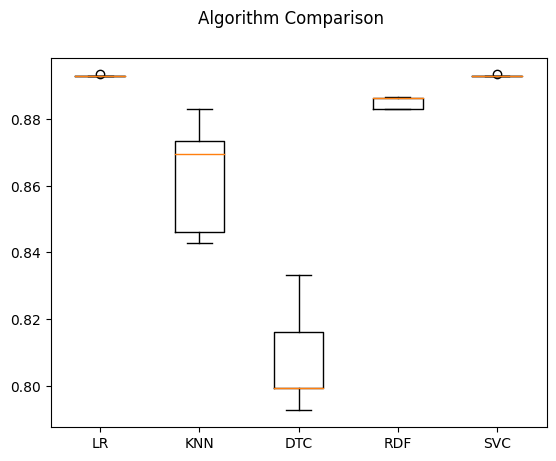

In [155]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', linear_model.LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('SVC', SVC()))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
 cv_results = model_selection.cross_val_score(model, X, y, scoring=scoring)
 results.append(cv_results)
 names.append(name)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [156]:
# Calculating auc score for KNC model
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)
auc

0.6124002900652646

**Plotting AUC for KNC model**

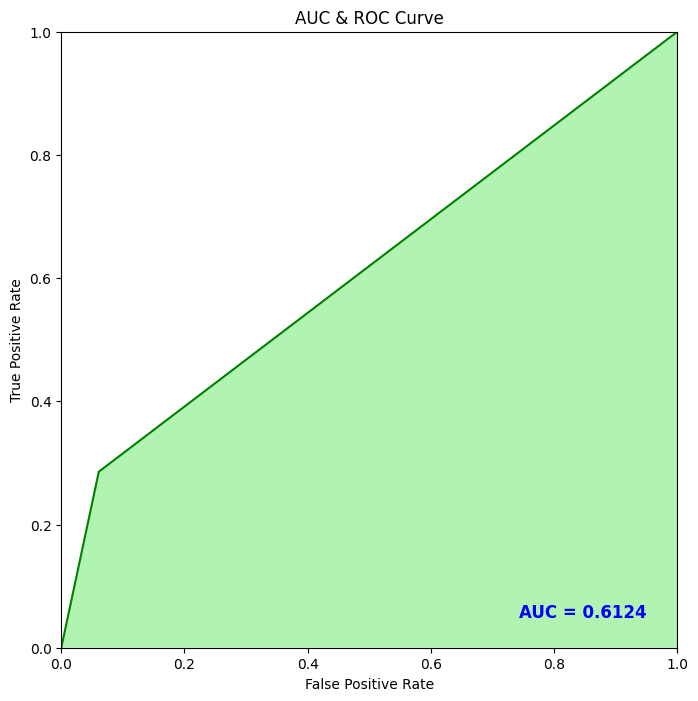

In [157]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [158]:
X.tail()

,Ind_ID,Car_Owner,Propert_Owner,Annual_income,Housing_type,Employed_days,Mobile_phone,Type_Occupation,Age
S.NO,,,,,,,,,
1542,5118268,1,0,360000.0,1,-3536,1,4,30.0
1544,5023655,0,0,225000.0,1,-1209,1,0,28.0
1545,5115992,1,1,180000.0,1,-2477,1,10,36.0
1546,5118219,1,0,270000.0,1,-645,1,4,41.0
1547,5053790,1,1,225000.0,1,-2859,1,8,45.0


Predicting credit card approval based on input data by using KNN Classification model.

In [159]:
new_input=[[5053790,1,1,225000.0,1,-2859,1,8,45]]
classifier1= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier1.fit(X_train, y_train)
new_pred1= classifier1.predict(new_input)
print(new_pred1)
if new_pred1==1:
  print("Not approved")
else: print("approved")

[0]
approved
